Поработаем с довольно нетипичными для аналитика данными: `gff` файлом, который описывает геном мухи.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
gff = pd.read_csv(r'C:\Users\yarus\projects\gff.tsv', sep='\t')

In [3]:
gff.head()

,seq_id,source,type,start,end,score,strand,phase,attributes
0,chr17,RefSeq,exon,6811330,6811453,.,+,.,Parent=XM_001475631.1
1,chr17,RefSeq,CDS,6808204,6808245,.,+,0,Name=CDS:NC_000083.5:LOC100040603;Parent=XM_00...
2,chr17,RefSeq,CDS,6811792,6811869,.,+,2,Name=CDS:NC_000083.5:LOC100040603;Parent=XM_00...
3,chr17,RefSeq,exon,6806513,6806553,.,+,.,Parent=XM_001475631.1
4,chr17,RefSeq,five_prime_UTR,6806513,6806526,.,+,.,Parent=XM_001475631.1


Выделим из колонки attributes значение атрибута Parent. Т.е. если там записано Parent=x, то нам нужен x.

In [4]:
pattern = r'Parent=(?P<parent>[\w\.]+)'
parent = gff.attributes.str.extract(pattern)

In [5]:
parent.head()

,parent
0,XM_001475631.1
1,XM_001475631.1
2,XM_001475631.1
3,XM_001475631.1
4,XM_001475631.1


Выясним, какое из значений является самым частым.

In [6]:
parent.parent.value_counts()

XM_001475631.1    479
NC_000083.5        33
Name: parent, dtype: int64

In [7]:
gff.type.value_counts()

exon               201
CDS                170
five_prime_UTR      47
mRNA                33
three_prime_UTR     32
protein             29
Name: type, dtype: int64

Построим распределение встречаемости значений в столбце type

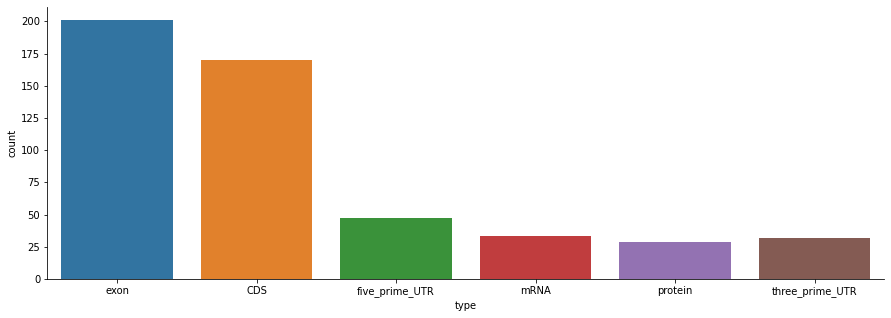

In [8]:
fix, ax = plt.subplots(figsize=(15, 5))
sns.countplot(data=gff, x='type', ax=ax)
sns.despine()